In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from collections import Counter
import collections
import string
from datetime import datetime as dt
from datetime import timedelta

In [2]:
kigo = string.punctuation
number = string.digits
moji = string.ascii_lowercase

In [29]:
import pandas as pd
import wikipedia
articles=['Data Science','Artificial intelligence','European Central Bank','Bank','Financial technology','International Monetary Fund','Basketball','Swimming']
wiki_lst=[]
title=[]
for article in articles:
    print("loading content: ",article)
    wiki_lst.append(wikipedia.page(article).content)
    title.append(article)

loading content:  Data Science
loading content:  Artificial intelligence
loading content:  European Central Bank
loading content:  Bank
loading content:  Financial technology
loading content:  International Monetary Fund
loading content:  Basketball
loading content:  Swimming


In [34]:
wiki_lst

['Data science is an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data. Data science is related to data mining, machine learning and big data.\nData science is a "concept to unify statistics, data analysis and their related methods" in order to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, domain knowledge and information science. Turing award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational and now data-driven) and asserted that "everything about science is changing because of the impact of information technology" and the data deluge.\n\n\n== Foundations ==\nData science is an interdisciplinary field focused on extracting knowledge from data sets, which are typically large (see big dat

In [3]:
strdt = dt.strptime("20100101", '%Y%m%d')  # 開始日
enddt = dt.strptime("20191231", '%Y%m%d')  # 終了日

days_num = (enddt - strdt).days + 1

In [4]:
datelist = []
for i in range(days_num):
    datelist.append(strdt + timedelta(days=i))

In [70]:
texts = pd.read_csv('news-data/NEWS-category-split0-700-3.csv')

In [71]:
texts.set_index('date')
dateTimeIndex = pd.DatetimeIndex(texts['date'])
texts.index = dateTimeIndex
texts = texts.drop("date", axis=1)

In [72]:
articles=["sportsNews","business","technologyNews","worldNews","entertainmentNews","oddlyEnoughNews","domesticJPNews"]

In [73]:
texts['category'] == "sportsNews"

date
2011-06-14 04:02:17+00:00    False
2011-06-15 01:31:32+00:00    False
2011-06-15 01:37:23+00:00    False
2011-06-15 02:27:28+00:00    False
2011-06-16 00:19:46+00:00    False
                             ...  
2021-01-04 07:43:43+00:00    False
2021-01-04 08:09:32+00:00    False
2021-01-04 08:09:32+00:00    False
2021-01-04 08:12:58+00:00    False
2021-01-04 08:12:58+00:00    False
Name: category, Length: 43422, dtype: bool

In [ ]:
import MeCab
news_lst=[]
title=[]

tokenizer = MeCab.Tagger()
tokenizer.parse("")

for article in articles:
    print("loading content: ",article)
    exe = texts[texts.category == 'sportsNews']
    exe2 = exe['NEWS'].to_list()
    exe3 = '。'.join(exe2)
    node = tokenizer.parseToNode(exe3)
    keywords = []
    while node:
        if node.feature.split(",")[0] == u"名詞":
            keywords.append(node.surface)
        elif node.feature.split(",")[0] == u"形容詞":
            keywords.append(node.feature.split(",")[6])
        elif node.feature.split(",")[0] == u"動詞":
            keywords.append(node.feature.split(",")[6])
    node = node.next
    news_lst.append(exe3)
    title.append(article)

loading content:  sportsNews


In [ ]:
keywords

In [22]:
keyword = '。'.join(keywords)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(keyword)

C:\home\anaconda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  """
C:\home\anaconda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  """
C:\home\anaconda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
C:\home\anaconda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  """
C:\home\anaconda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (6). Possi

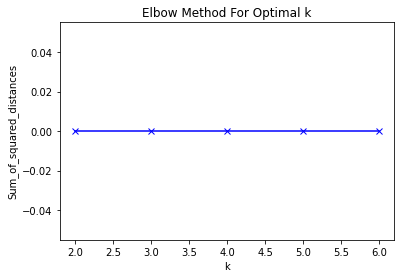

In [24]:
Sum_of_squared_distances = []
K = range(2,7)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=7)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [25]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=7)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

               title  cluster
0         sportsNews        0
1           business        0
2     technologyNews        0
3          worldNews        0
4  entertainmentNews        0
5    oddlyEnoughNews        0
6     domesticJPNews        0


C:\home\anaconda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
artical['date'] = date
artical.set_index('date')

,result
date,
2010-01-01,日 米国 。 」 税 バ フロリダ 日 日本 バ 。 世紀 ウクライナ...
2010-01-02,日 ホノルル ホノルル プロ 午後 午後 午後 落とし 学生 日本 ...
2010-01-03,ス ス 及び 及び 及び 翌日 内 一部 全 女子
2010-01-04,ヘ や 世界 市 新 や ダウ 会長 は アメリカ は イ...
2010-01-05,および 安倍 で 評価 評価 および で 世界 評価 米国 調査 情報 英国 世界 ...
...,...
2019-12-05,米 戦 空調 。 特別 を 空調 予防 無い 特別 予防 ドルフ 自動車 士官...
2019-12-06,予備 下院 今回 として ホームページ で − で 今回 災害 き に バー き ス...
2019-12-07,で 計画 後 交渉 オンライン 後 ヴァー で 計画 ヴァー 交渉 大使 大使 内閣...


In [9]:
vec = artical['result']
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(vec)

In [27]:
vec

0       日 米国 。 」 税    バ    フロリダ  日 日本 バ   。   世紀 ウクライナ...
1                  日  ホノルル ホノルル プロ 午後 午後 午後 落とし 学生 日本 ...
2                            ス  ス 及び 及び 及び 翌日 内 一部 全 女子  
3       ヘ    や 世界 市 新  や  ダウ 会長       は    アメリカ は    イ...
4        および  安倍 で 評価 評価 および で  世界 評価 米国 調査 情報  英国 世界 ...
                              ...                        
3312    米 戦   空調 。 特別 を  空調 予防 無い   特別 予防  ドルフ  自動車 士官...
3313    予備  下院 今回 として ホームページ で − で 今回  災害   き に バー き ス...
3314      で 計画 後 交渉 オンライン 後 ヴァー  で 計画  ヴァー 交渉 大使 大使 内閣...
3315    議会  フランス  イースト 決勝 ヨーロッパ  平和 鉄道  欧州 イタリア 連合 ワシン...
3316     人民 エンターテイメント  中華   東京 会  週  会議 会議  トップ    週 月...
Name: result, Length: 3317, dtype: object

In [11]:
Sum_of_squared_distances = []
K = range(2,30)

In [12]:
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

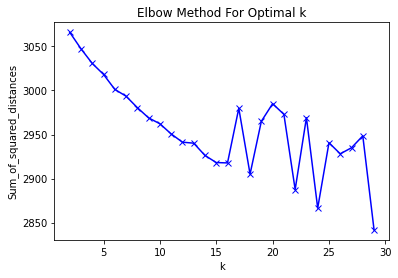

In [13]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [14]:
articles=["スポーツ","ビジネス","テクノロジー","国際","エンターテインメント","国内","その他"]
title=["スポーツ","ビジネス","テクノロジー","国際","エンターテインメント","国内","その他"]

In [26]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=7)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

        title  cluster
3          国際        0
4  エンターテインメント        0
6         その他        0
0        スポーツ        1
1        ビジネス        1
2      テクノロジー        1
5          国内        1


In [17]:
result={'cluster':labels,'news':vec}
result=pd.DataFrame(result)

Cluster: 0
Titles
 スポーツ
 ビジネス


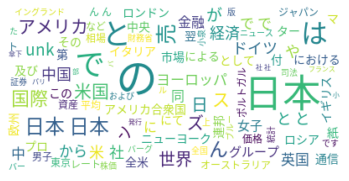

Cluster: 1
Titles
 その他


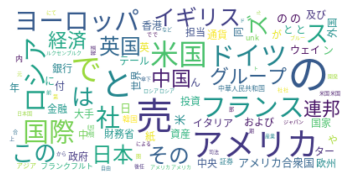

Cluster: 2
Titles
Series([], )


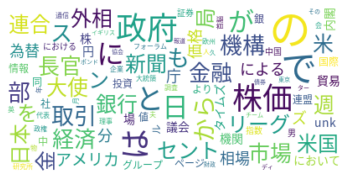

Cluster: 3
Titles
 テクノロジー
     国内


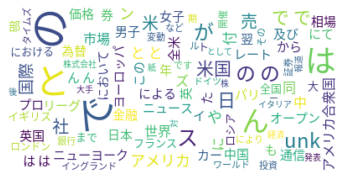

Cluster: 4
Titles
Series([], )


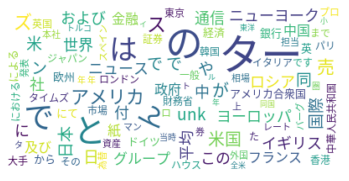

Cluster: 5
Titles
Series([], )


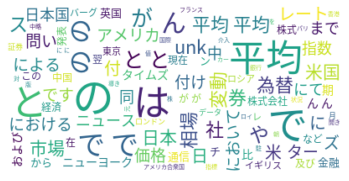

Cluster: 6
Titles
Series([], )


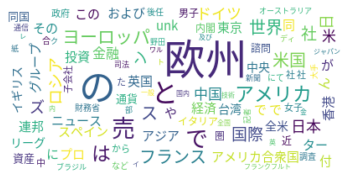

Cluster: 7
Titles
Series([], )


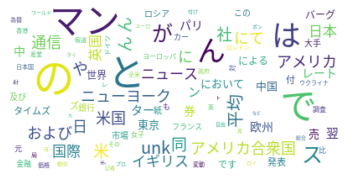

Cluster: 8
Titles
         国際
 エンターテインメント


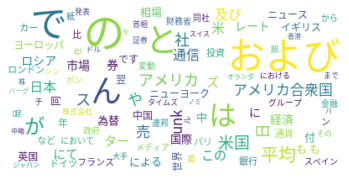

Cluster: 9
Titles
Series([], )


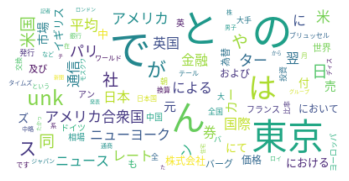

In [39]:
dictionary=[]
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['news'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    dictionary.append(text)
    wordcloud = WordCloud(font_path="NotoSansCJKjp-hinted/NotoSansCJKjp-Regular.otf",max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']         
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    plt.savefig('wordcloud-cluster'+str(k)+'.png')

In [40]:
key={}
for i in range(0,k+1):
    key[i] = Counter(dictionary[i].split()).keys()

In [61]:
texts['category'] = 0
J=["1","2","3","4","5"]
texts_category=[]
for i in range(0,len(texts)):
    if i%10000==0:
        print(i)
    category=[]
    for j in J:
        k=0
        for k in key:
            if texts[j].iloc[i] in key[k]:
                category.append(k)
            k+=1
    texts_category.append(category)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000


In [63]:
texts["category"]=texts_category

In [64]:
texts

,1,2,3,4,5,category
date,,,,,,
2010-01-01,##華,##新,##合,##ワールド,##日,[]
2010-01-01,アメリカ,##。,アメリカ合衆国,と,米国,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, ..."
2010-01-01,と,、,の,##、,##。,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, ..."
2010-01-01,」,)」,!」,...」,-」,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"
2010-01-01,##イン,##キャ,##エク,##コン,税,"[0, 1, 2, 3, 4, 6]"
...,...,...,...,...,...,...
2019-12-09,同,同社,一部,フランチャイズ,各,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, ..."
2019-12-09,が,は,で,も,を,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, ..."
2019-12-09,・,、,島,の,##・,"[0, 1, 2, 3, 5, 6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"


In [58]:
type(texts["1"].iloc[0])

str

In [45]:
key[2]

dict_keys(['日', '自然', 'の', 'キャメロン', 'です', 'ニューヨーク', '政府', 'トー', '世界', '国際', 'ン', 'ドル', '金融', '中', '株式', 'ロー', '期', '売', 'も', 'レ', '落', 'unk', 'に', '株価', '投資', '日本', '日報', '。', 'グループ', 'ビー', '需', '『', '自治', 'ニュージーランド', 'イギリス', '営業', '翌', 'と', '英', 'で', 'でし', 'は', 'ん', 'オーストラリア', 'マドリード', 'ジャパン', '州都', '閲覧', 'という', '話題', '全米', 'ビル', '相場', '再', 'が', '女子', 'イタリア', 'エクス', '地区', '表', 'ロシア', '米', '経済', '証券', '外国', 'アメリカ', 'ポート', '発行', '価格', '関連', '一', 'アメリカ合衆国', 'リアル', 'を', '量', 'オバマ', '産経新聞', 'アッ', 'プレミア', '現在', '米国', '券', 'イ', '「', '市場', 'り', '郎', '円', '試合', '機構', '育', '許', 'フラン', '力士', '国立', '前', '大使', '週間', '県営', '日本人', 'セント', '共産党', 'オークランド', '王者', '監督', 'シングルス', '取引', 'プロ', '圏', 'ごと', '連', '年', 'フェ', 'による', 'ハン', 'ウォン', 'ニュース', 'シドニー', '秋', 'リーグ', '日間', '清', '外貨', 'モスクワ', 'な', 'から', '店頭', '高', 'セントラル', '柳', '対', '平', '会計', 'てる', '部', 'デイリー', '調整', '三塁手', '後', '決勝', 'に対して', 'について', '所', '太', '監禁', '指揮', '通信', '路', '資産', '外相', 'ポンド', 'フォーラム', '社', 'た', 'せ', '終了', 'マクドナルド', 'なく', '分', '年間'

In [26]:
texts.to_csv("category-test.csv")

In [27]:
Counter(texts['category'])

Counter({0: 100428, 2: 121662, 1: 23765})

In [27]:
artical = pd.DataFrame(index=[],columns=['result'])
date = dateTimeIndex.drop_duplicates()
num=[]
for i in range(0,2):
    dates = str(date[i].strftime("%Y-%m-%d"))
    for j in range(1,6):
        if i == i:
            kari = texts[dates:dates][str(j)]
        else:
            kari = artical.append(texts[dates:dates][str(j)])
    num.append(Counter(kari))
    table = str.maketrans( '', '',kigo)
    StrA = ''.join(str(kari.values.tolist()))
    result = StrA.translate(table)
    table = str.maketrans( '', '',number)
    result = result.translate(table)
    table = str.maketrans( '', '',moji)
    result = result.translate(table)
    table = str.maketrans( '', '','・、')
    result = result.translate(table)
    print(str(i)+"/回"+result)
    tmp_se = pd.Series( result, index=artical.columns )
    artical = artical.append( tmp_se, ignore_index=True )

0/回ル  の 分 暴力 を ハンドボール  旅行  目 県内  公園   司 トル より  注目  は お お れる グ の  について    と 道 頭 
1/回  大使 円   週間 県営 王者 日本人 フラン  セント に 共産党 オークランド 前 フラン 国立  郎      円 試合  り  機構 育 許 許 フラン 力士


In [ ]:
dates = str(date[1].strftime("%Y-%m-%d"))

In [ ]:
dates

In [ ]:
artical['1'] = texts['2018-01-04':'2018-01-03'][str('1')]

In [ ]:
artical['1']